# Measuring and estimating execution time behaviour

We write programs to solve computational problems. In this section we are interested not so much in what the program calculates but instead in something that we can observe from the program execution: how much time execution takes.

## Experiments
We start by designing experiments that expose the execution time behaviour of programs. We borrrow ideas from the book [Introduction to Programming in Python](https://introcs.cs.princeton.edu/python/home/).

Notice that the experiments we describe are actually implemented as *programs* that generate data for us to analyse and draw conclusions:

* We start with a program $P$ that solves a problem, 
* we then write a program that *uses* $P$ to solve many instances of the problem to be able to collect data about the execution time. 
* We analyse the data to draw conclusions.

We hope that this approach contributes to develop your programming skills and that you get to know fragments of Python that you might not encounter otherwise.

## What it is that we want to observe in order to collect data?
We are interested in **time**. We want quantitative measurments of the time it takes for a program to execute: measure the execution time (running time) of a program. In Python there is support for doing so in the module ```time``` documented in [time](https://docs.python.org/3/library/time.html). We are interested in functions that measure time our program is running. We believe the closest we can get to this is the function 

```Python
process_time() 
```
that, according to the documentation returns a float with *the value (in fractional seconds) of the sum of the system and user CPU time of the current process. It does not include time elapsed during sleep. It is process-wide by definition. The reference point of the returned value is undefined, so that only the difference between the results of two calls is valid.*

We can also use 

```Python
process_time_ns() 
```

that returns an integer with the number of nanoseconds. In both cases, we need to establish a starting point for the measurement and then take the difference with the point where the measurement should end. 

Here is a first example with two ways of calculating the sum of all squares up to a bound:

$$ \sum_{i = 0}^{i < bound}{i ^2} $$

In the first version we use ```i * i``` to calculate $i^2$:
```Python
value1 = 0
for i in range(bound):
    value1 += i * i
```

In the second version we use ```i ** 2``` instead:
```Python
value2 = 0
for i in range(bound):
    value2 += i ** 2
```

In both versions we have added code to also calculate the running time:

In [1]:
import time

In [2]:
bound = 10000000

start1 = time.process_time_ns() 
value1 = 0
for i in range(bound):
    value1 += i * i
running_time1 = time.process_time_ns() - start1

start2 = time.process_time_ns() 
value2 = 0
for i in range(bound):
    value2 += i ** 2
running_time2 = time.process_time_ns() - start2

print(value1, running_time1)
print(value2, running_time2)

333333283333335000000 1118811000
333333283333335000000 2693223000


When you test this program you will observe two things:

1) Of course ```value1``` is equal to ```value2``` for a given bound.  But the running times are not the same: the fragment that uses ```** 2``` takes longer time.

2) Running the program several times for a given bound yields different values of running time. This is due to the fact that the process that is measured is involved in more than just our code cell, it is running this notebook which involves autosaving and a lot of other stuff. 

3) If we increase the bound then the execution time increases.

We now program a function that can allow us to compare the two execution times for different bounds. Observe that we use ```process_time()``` instead of ```process_time_ns()``` because we will print the quotient. 


In [3]:
def running_time_experiment_sum_squares(initial_bound, step, times):
    
    bound = initial_bound

    for t in range(times):
        
        start1 = time.process_time() 
        value1 = 0
        for i in range(bound):
            value1 += i * i
        running_time1 = time.process_time() - start1

        start2 = time.process_time() 
        value2 = 0
        for i in range(bound):
            value2 += i ** 2
        running_time2 = time.process_time() - start2
        
        print(bound, 
              running_time1, 
              running_time2, 
              running_time2 / running_time1)
        
        bound *= step

In [4]:
# Start with a bound of 1000, double the bound each time and do it 15 times.

running_time_experiment_sum_squares(1000, 2, 15)

1000 7.599999999996498e-05 0.00023299999999970566 3.0657894736817504
2000 0.00015300000000006975 0.00047099999999922204 3.0784313725425316
4000 0.0003150000000005093 0.0009579999999997924 3.0412698412642647
8000 0.0006129999999995306 0.0019260000000000943 3.1419249592195255
16000 0.0012410000000002697 0.0038469999999994897 3.0999194198216387
32000 0.002500000000000391 0.007781999999999734 3.1127999999994067
64000 0.004903999999999797 0.015570000000000306 3.1749592169659357
128000 0.009997999999999507 0.031024999999999636 3.1031206241249416
256000 0.019999000000000322 0.061949999999999505 3.0976548827440626


512000 0.03957700000000042 0.1240319999999997 3.1339414306288598


1024000 0.08024500000000057 0.2468130000000004 3.075743036949326


2048000 0.1587670000000001 0.4919779999999996 3.098742181939567


4096000 0.31739300000000004 0.9833259999999999 3.098133859284861


8192000 0.6316429999999995 1.980581 3.13560191437252


16384000 1.2714400000000001 3.952271999999999 3.108500597747435


In my system the results show that the use of ```** 2``` makes the program about 3 times slower compared to using ```*```. This relation does not seem to change as the bound grows.


The total execution time of each fragment grows when the bound grows, but it *grows at the same rate* for both fragments.

Is it always like this? Well, no! Lets try using ```+``` and a ```for``` loop instead of times in yet another fragment in our experiment:


In [5]:
def running_time_experiment_sum_squares_v2(initial_bound, step, times):
    
    bound = initial_bound

    for t in range(times):
        
        start1 = time.process_time() 
        value1 = 0
        for i in range(bound):
            value1 += i * i
        running_time1 = time.process_time() - start1

        start2 = time.process_time() 
        value2 = 0
        for i in range(bound):
            value2 += i ** 2
        running_time2 = time.process_time() - start2
        
        start3 = time.process_time() 
        value3 = 0
        for i in range(bound):
            sq = 0
            for j in range(i):
                sq += i
            value3 += sq
        running_time3 = time.process_time() - start3
        
        print(bound, 
              running_time1, 
              running_time2, 
              running_time3, 
              running_time2 / running_time1, 
              running_time3 / running_time1)
        
        bound *= step

In [6]:
# Start with a bound of 1000, double the bound each time and do it 5 times.

running_time_experiment_sum_squares_v2(1000, 2, 5)

1000 7.899999999949614e-05 0.00023200000000045407 0.022548999999999708 2.9367088607839715 285.43037974865223
2000 0.00015500000000123748 0.00046999999999997044 0.0941409999999987 3.0322580644917294 607.3612903177233


4000 0.0003170000000007889 0.000968000000000302 0.38250599999999935 3.0536277602457194 1206.6435331200234


8000 0.0006160000000008381 0.0019290000000005136 1.5548649999999995 3.13149350649008 2524.1314935030587


16000 0.0012259999999990612 0.003955000000001263 6.239272 3.2259380097914288 5089.128874392151


I hope you can observe that the third approach is not only *much* slower: it is also the case that when the bound grows the execution time grows much faster! In my system, for a bound of 1000 it is 300 times slower and for a bound of 16000 it is 5000 times slower!

This should make you curious about exploring *execution time* **as a function of** some characteristic of the input that measures *the problem size*.

 # Understanding the math for algorithm analysis

The book [Algorithms Illuminated](http://www.algorithmsilluminated.org) explains *asymptotic notation*, the mathematical formalism that is used for analysing the execution time of algorithms. 

We now take a look at these concepts and illustrate them with programs that allow you to experiment with each of the concepts. Our hope is that this section will help you understand the math and also get some practice in using yet more fragments of Python while developing your programming skills even further.

We start by exploring how some functions behave when their input become larger and larger. 

## Constant functions

These are functions that have the same value for all inputs. Here are some examples:
$$ f(x) = 3$$

$$ g(x) = -34$$

$$ h(x) = 1234567,89$$

Here is a little tool to plot functions in Python. We need the module ```matplotlib```. 

In [7]:
import matplotlib.pyplot as plt

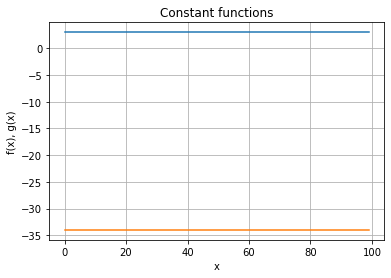

In [8]:
# The x values:
x  = range(100)

# The y values for the constant functions 3 and -34
fx = [3 for i in x]
gx = [-34 for i in x]

# Prepare the tool:
_,ax = plt.subplots()

# Plot the points for fx and gx:
ax.plot(x, fx)
ax.plot(x,gx)

# Decorate the graph:
ax.set(xlabel='x', ylabel='f(x), g(x)',
       title='Constant functions')

# Add a grid:
ax.grid()

# Display:
plt.show()

## Linear functions

We will only consider linear functions that are grow as the argument grows: positive slope.

$$f(x) = 4x + 10$$

$$g(x) = 2x + 100$$

The slope is the coefficient of $x$. The other number is the point where the line crosses the $y$-axis (when $x$ is $0$)

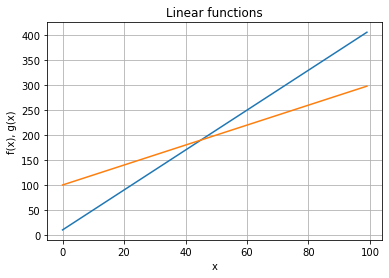

In [9]:
# The x values:
x  = range(100)

# The y values for the linear function 4x + 10 and 2x + 100
fx = [4*i+10 for i in x]
gx = [2*i+100 for i in x]


# Prepare the tool:
_,ax = plt.subplots()

# Plot the points for fx and gx:
ax.plot(x, fx)
ax.plot(x, gx)


# Decorate the graph:
ax.set(xlabel='x', ylabel='f(x), g(x)',
       title='Linear functions')

# Add a grid:
ax.grid()

# Display:
plt.show()

## Quadratic functions

$$ f(x) = 3x^2 + 4x + 10 $$

$$ g(x) = 5x^2 + 4x + 10$$

Make sure you notice the values that the functions take in the $y$-axis.

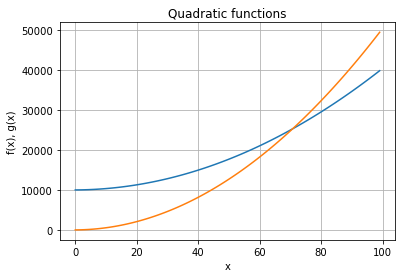

In [10]:
# The x values:
x  = range(100)

# The y values for the quadratic function 3x^2 + 4x + 10 and 5x^2 + 4x + 10
fx = [3*i*i + 4*i + 10000 for i in x]
gx = [5*i*i+ 4*i + 10 for i in x]


# Prepare the tool:
_,ax = plt.subplots()

# Plot the points for fx and gx:
ax.plot(x, fx)
ax.plot(x, gx)


# Decorate the graph:
ax.set(xlabel='x', ylabel='f(x), g(x)',
       title='Quadratic functions')

# Add a grid:
ax.grid()

# Display:
plt.show()

## Logarithmic functions

We have illustrated functions that do not grow (constant functions), functions that grow with a constant slope (linear functions) and functions that grow with increasing slope (quadratic functions). 

Are there functions that grow with a decreasing slope? Well yes: logarithmic functions:

$$ f(x) = \ln(x) $$

$$ g(x) = \log_2(x) + 5$$

We now need the ```math```module to be able to use the logarithm functions.

In [11]:
import math

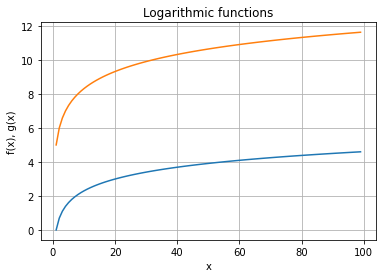

In [12]:
# The x values:
x  = range(1,100)

# The y values for the logarithmic functions ln(x) and log_2(x) + 5
fx = [math.log(i) for i in x]
gx = [math.log2(i) + 5 for i in x]


# Prepare the tool:
_,ax = plt.subplots()

# Plot the points for fx and gx:
ax.plot(x, fx)
ax.plot(x, gx)


# Decorate the graph:
ax.set(xlabel='x', ylabel='f(x), g(x)',
       title='Logarithmic functions')

# Add a grid:
ax.grid()

# Display:
plt.show()

It is interesting to see what happens of we put all of them in one plot!

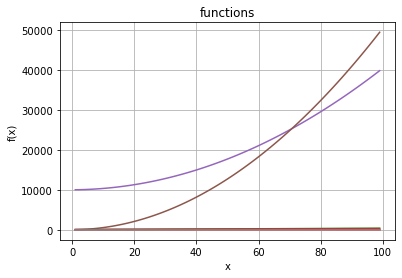

In [13]:
# The x values:
x  = range(1,100)
# The y values
f1 = [3 for i in x]
f2 = [-34 for i in x]
f3 = [4*i+10 for i in x]
f4 = [2*i+100 for i in x]
f5 = [3*i*i + 4*i + 10000 for i in x]
f6 = [5*i*i+ 4*i + 10 for i in x]
f7 = [math.log(i) for i in x]
f8 = [math.log2(i) + 5 for i in x]


# Prepare the tool:
_,ax = plt.subplots()

# Plot the points for f1 ... f8:
ax.plot(x, f1)
ax.plot(x, f2)
ax.plot(x, f3)
ax.plot(x, f4)
ax.plot(x, f5)
ax.plot(x, f6)
ax.plot(x, f7)
ax.plot(x, f8)


# Decorate the graph:
ax.set(xlabel='x', ylabel='f(x)',
       title='functions')

# Add a grid:
ax.grid()

# Display:
plt.show()

Can you explain what you see?

We leave the quadratic functons out (they are too *dominant*).

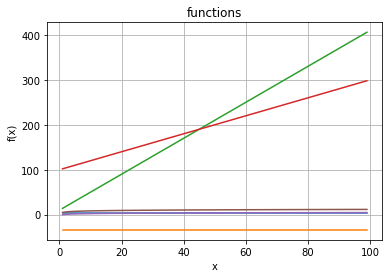

In [14]:
# The x values:
x  = range(1,100)
# The y values
f1 = [3 for i in x]
f2 = [-34 for i in x]
f3 = [4*i+10 for i in x]
f4 = [2*i+100 for i in x]
#f5 = [3*i*i + 4*i + 10000 for i in x]
#f6 = [5*i*i+ 4*i + 10 for i in x]
f7 = [math.log(i) for i in x]
f8 = [math.log2(i) + 5 for i in x]


# Prepare the tool:
_,ax = plt.subplots()

# Plot the points for all functions except f5 and f6
ax.plot(x, f1)
ax.plot(x, f2)
ax.plot(x, f3)
ax.plot(x, f4)
#ax.plot(x, f5)
#ax.plot(x, f6)
ax.plot(x, f7)
ax.plot(x, f8)


# Decorate the graph:
ax.set(xlabel='x', ylabel='f(x)',
       title='functions')

# Add a grid:
ax.grid()

# Display:
plt.show()

Now the linear functions dominate! So let's leave them out too:

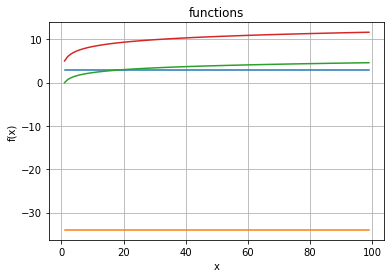

In [15]:
# The x values:
x  = range(1,100)
# The y values
f1 = [3 for i in x]
f2 = [-34 for i in x]
#f3 = [4*i+10 for i in x]
#f4 = [2*i+100 for i in x]
#f5 = [3*i*i + 4*i + 10000 for i in x]
#f6 = [5*i*i+ 4*i + 10 for i in x]
f7 = [math.log(i) for i in x]
f8 = [math.log2(i) + 5 for i in x]


# Prepare the tool:
_,ax = plt.subplots()

# Plot the points for f1, f2, f7 and f8:
ax.plot(x, f1)
ax.plot(x, f2)
#ax.plot(x, f3)
#ax.plot(x, f4)
#ax.plot(x, f5)
#ax.plot(x, f6)
ax.plot(x, f7)
ax.plot(x, f8)


# Decorate the graph:
ax.set(xlabel='x', ylabel='f(x)',
       title='functions')

# Add a grid:
ax.grid()

# Display:
plt.show()

Logarithms for large values of the argument are almost constant!

## Ordering functions according to how fast they grow

1) Constant

2) Logarithmic

3) Linear

4) Linearithmic (can you guess what this is?)

5) Quadratic

6) Cubic

7) Exponential (can you guess what this is?)

# Experiments with asymptotic running time

In the book you will find out how these functions are used to estimate how the execution time grows as a function of some size of the input. 

Here are some of the examples from the book as programs. In the book you are asked to guess the asymptotic running time of the code fragments. Here we do experiments to see what we can say from data we observe and relate to the discussions in the book.

In all cases you are asked to guess whether the asymptotic behaviour is constant, logarithmic, linear or quadratic. 

## Searching one array

The algorithm is presented in the book. We show how to organise an experiment and you will be asked to do the other cases on your own.

The first program is as follows:

In [16]:
def search1(a, t):
    n = len(a)
    for i in range(n):
        if a[i] == t: return True
    return False

In [17]:
search1([1,2,3,4,5,6], 3)

True

And here is how we can set up an experiment.

First we need to identify what characteristic of the input can influence the running time: what is the size of the input?

Given that the number of iterations is at most the length of the input array we settle for this. The maximum number of iterations is reached whenever the input is such that the sought element does not occur in the array. 

We then meassure execution time for arrays of increasing sizes not containing the sought element. We can do this by generating ranges of positive numbers and looking for -1.

In [18]:
import time

In [19]:
def running_time_data(start_size, step, times):
    n = start_size
    results = ([0] * times, [0] * times)
    for i in range(times):
        a = list(range(n))
        start = time.process_time_ns() 
        search1(a,-1)
        (results[0][i],results[1][i]) = (n, time.process_time_ns() - start)
        n *= step
    return results
        

In [20]:
# You could use this data in a table or, as below, in a plot
running_time_data(1000,2,15)

([1000,
  2000,
  4000,
  8000,
  16000,
  32000,
  64000,
  128000,
  256000,
  512000,
  1024000,
  2048000,
  4096000,
  8192000,
  16384000],
 [158000,
  308000,
  621000,
  1251000,
  2472000,
  4986000,
  10338000,
  21364000,
  41514000,
  82111000,
  132291000,
  107150000,
  207231000,
  434085000,
  860222000])

In [21]:
import matplotlib.pyplot as plt

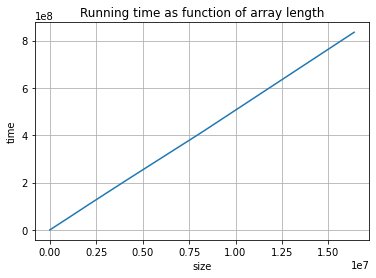

In [22]:
(size,t) = running_time_data(1000,2,15)

# Prepare the tool:
_,ax = plt.subplots()

# Plot the points fo fx and gx:
ax.plot(size, t)

# Decorate the graph:
ax.set(xlabel='size', ylabel='time',
       title='Running time as function of array length')

# Add a grid:
ax.grid()

# Display:
plt.show()

### Quiz 
Adapted to Python from Quiz 2.1 in Algorithms illuminated, part 1, page 39.
The solution to the quiz is discussed in section 2.1.4 of the book. The explanation is not based on an experiment but on counting operations and using asymptotic analysis. Does the experiment confirm the answer?

What is the asymptotic running time for ```search1```?

1) $O(1)$

2) $O($log$ \,n)$

3) $O(n)$

4) $O(n^2)$



## Searching two arrays

In the cell below you have the program for searching.

You should try an experiment at in the previous case. We recommend you to use a smaller number of times you duplicate the size of the arrays. 

In [23]:
def search2(a,b,t):
    n = len(a)
    for i in range(n):
        if a[i] == t: return True
    for i in range(n):
        if b[i] == t: return True
    return False    

In [24]:
search2([1,2,3,4,5,6], [-1,-2,-3,-4,-5,-6], 0)

False

### Quiz 
Adapted to Python from Quiz 2.2 in Algorithms illuminated, part 1, page 40.
The solution to the quiz is discussed in section 2.1.4 of the book. The explanation is not based on an experiment but on counting operations and using asymptotic analysis. Does the experiment confirm the answer?

What is the asymptotic running time for ```search2```?

1) $O(1)$

2) $O($log$ \,n)$

3) $O(n)$

4) $O(n^2)$




## Checking for a common element

In [25]:
def common(a,b):
    n = len(a)
    for i in range(n):
        for j in range(n):
            if a[i] == b[j]: return True
    return False

In [26]:
common([1,2,3,4,5,6], [-1,-2,-3,-4,-5,-6])

False

### Quiz 
Adapted to Python from Quiz 2.3 in Algorithms illuminated, part 1, page 41.
The solution to the quiz is discussed in section 2.1.4 of the book. The explanation is not based on an experiment but on counting operations and using asymptotic analysis. Does the experiment confirm the answer?

What is the asymptotic running time for ```common```?

1) $O(1)$

2) $O($log$ \,n)$

3) $O(n)$

4) $O(n^2)$




## Checking for duplicates

In [27]:
def duplicates(a):
    n = len(a)
    for i in range(n):
        for j in range(i + 1, n):
            if a[i] == a[j]: return True
    return False

In [28]:
duplicates([1,2,3,4,3,2,1])

True

### Quiz 
Adapted to Python from Quiz 2.4 in Algorithms illuminated, part 1, page 42.
The solution to the quiz is discussed in section 2.1.4 of the book. The explanation is not based on an experiment but on counting operations and using asymptotic analysis. Does the experiment confirm the answer?

What is the asymptotic running time for ```duplicates```?

1) $O(1)$

2) $O($log$ \,n)$

3) $O(n)$

4) $O(n^2)$




## Sorting

We leave as an exercise that you generate running time data and plot the timing results for the sorting algorithms we programmed in the section Order and sorting: selection sort, insertion sort and bubble sort. 